# Final Project 1 (PYTN-KS18)
##### Anggota Kelompok :
1. Abraham Linggom Tampubolon
2. Farhan Ihtifazhuddin
3. Meila Suci

# Perkenalan
#### A. Latar Belakang:
Kasus yang kita pilih dalam proyek ini adalah analisis harga atau tarif dari layanan Uber dan Lyft. Uber dan Lyft adalah perusahaan transportasi berbasis aplikasi yang populer di banyak negara, termasuk dalam industri ridesharing. Kedua perusahaan ini menawarkan layanan transportasi dengan menggunakan mobil pribadi yang dioperasikan oleh pengemudi independen.

#### B. Data yang Digunakan:
Dataset yang digunakan dalam proyek ini adalah "rideshare_kaggle.csv". Dataset ini merupakan contoh dataset untuk harga pings (permintaan) dari Uber dan Lyft. Dataset ini berisi informasi tentang atribut-atribut yang terkait dengan pemesanan, seperti jam, hari, bulan, sumber (destinasi awal), tujuan (destinasi akhir), tipe transportasi (Uber atau Lyft), dan atribut-atribut lainnya yang relevan.

Dataset ini memiliki sejumlah kolom yang mencakup informasi yang relevan untuk analisis harga. Jumlah data yang terdapat dalam dataset ini tidak dijelaskan secara spesifik.

#### C. Objective yang Ingin Dicapai:
Tujuan dari proyek ini adalah untuk menganalisis dataset harga pings dari Uber dan Lyft. Dalam analisis ini, kita akan melihat hubungan antara atribut-atribut tertentu dalam dataset dengan harga pings yang tercatat. Selain itu, kita juga akan mempersiapkan data untuk digunakan dalam model regresi linear dan mengimplementasikan model tersebut untuk membuat prediksi harga.

Dengan melakukan analisis ini, kita dapat mendapatkan pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi harga pings dalam layanan Uber dan Lyft, serta melihat sejauh mana model regresi linear dapat digunakan untuk membuat prediksi harga yang akurat.

# Import pustaka
Berikut adalah daftar library yang akan digunakan dalam proyek ini:

In [185]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Data Loading
Melakukan proses data loading dari dataset "rideshare_kaggle.csv".

In [186]:
df = pd.read_csv("rideshare_kaggle.csv")
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.00,0.44,1.00,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.00,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.80,1544962084,1544994864,0.30,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.00,0.44,1.00,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.00,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.10,1543232969,1543266992,0.64,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.00,0.44,1.00,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.00,0.75,7.33,7.33,1543334400,10.00,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.70,1543319437,1543353364,0.68,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.75,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.44,1.00,42.21,-71.03,34.38,29.63,Clear,Partly cloudy throughout the day.,0.00,0.00,0.73,5.28,5.28,1543514400,10.00,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.00,291.10,1543492370,1543526114,0.75,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.00,0.44,1.00,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.70,9.14,9.14,1543446000,10.00,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.70,1543405904,1543439738,0.72,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.00,1.00,1.00,42.35,-71.06,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.00,0.00,0.74,2.34,2.87,1543672800,9.79,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.79,271.50,1543665331,1543698855,0.82,0.00,1543

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [188]:
# Mendeskripsikan variabel numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.00,1544045709.76,689192.49,1543203646.00,1543443968.00,1543737478.00,1544827509.00,1545160511.00
hour,693071.00,11.62,6.95,0.00,6.00,12.00,18.00,23.00
day,693071.00,17.79,9.98,1.00,13.00,17.00,28.00,30.00
month,693071.00,11.59,0.49,11.00,11.00,12.00,12.00,12.00
price,637976.00,16.55,9.32,2.50,9.00,13.50,22.50,97.50
distance,693071.00,2.19,1.14,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071.00,1.01,0.09,1.00,1.00,1.00,1.00,3.00
latitude,693071.00,42.34,0.05,42.21,42.35,42.35,42.36,42.37
longitude,693071.00,-71.07,0.02,-71.11,-71.08,-71.06,-71.05,-71.03
temperature,693071.00,39.58,6.73,18.91,36.45,40.49,43.58,57.22


In [189]:
# Mendeskripsikan variabel object
df.describe(include=object).T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


# Data Cleaning
Melakukan proses cleaning pada data, seperti memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dsb.



In [190]:
# Menghapus kolom data yang tidak diperlukan
df = df.drop(columns=['id', 'timezone', 'apparentTemperatureMaxTime', 'apparentTemperatureMinTime', 'temperatureMaxTime', 'temperatureMinTime',
                      'uvIndexTime', 'sunsetTime', 'sunriseTime', 'apparentTemperatureLowTime', 'apparentTemperatureHighTime', 'temperatureLowTime',
                      'temperatureHighTime', 'windGustTime', 'timestamp'])
df.sample(5)

,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
669177,10,16,12,2018-12-16 10:00:09,Haymarket Square,Theatre District,Lyft,lyft_luxsuv,Lux Black XL,26.00,1.28,1.00,42.36,-71.05,40.10,35.60,Overcast,Rain throughout the day.,0.00,0.00,0.73,6.44,8.22,10.00,43.83,34.25,38.38,28.30,cloudy,32.24,1022.84,60,1.00,0,10.00,308.80,0.30,0.13,39.22,43.83,33.98,38.38
311332,11,28,11,2018-11-28 11:44:08,Boston University,Financial District,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,7.25,1.00,42.36,-71.05,35.54,30.98,Mostly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.73,5.31,7.20,9.93,42.61,37.60,36.57,32.12,partly-cloudy-night,27.87,991.07,270,0.76,0,9.93,345.80,0.72,0.00,33.85,42.61,30.03,36.57
411974,3,29,11,2018-11-29 03:05:08,Theatre District,North End,Lyft,lyft_lux,Lux Black,19.50,1.72,1.00,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.00,0.70,9.14,9.14,10.00,42.18,36.71,35.75,30.29,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.70,0.72,0.00,33.10,42.18,29.11,35.75
375779,10,27,11,2018-11-27 10:51:22,Northeastern University,Beacon Hill,Lyft,lyft_line,Shared,7.00,2.42,1.00,42.35,-71.08,45.45,41.77,Light Rain,Light rain in the morning.,0.06,1.00,0.93,6.87,7.42,2.69,46.91,33.82,44.01,30.19,rain,43.52,989.98,79,1.00,0,2.69,296.20,0.68,0.14,36.34,46.91,32.43,44.01
84017,10,30,11,2018-11-30 10:17:55,Haymarket Square,West End,Lyft,lyft_luxsuv,Lux Black XL,26.00,0.56,1.00,42.36,-71.05,29.68,26.66,Clear,Mostly cloudy throughout the day.,0.00,0.00,0.85,3.03,3.03,9.88,42.52,31.71,40.53,28.06,clear-night,25.64,1015.68,296,0.00,0,9.88,281.40,0.79,0.00,28.79,42.52,26.41,40.53


In [191]:
# Mengubah tipe data datetime yang semula object menjadi datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df.sample()

,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
493488,20,29,11,2018-11-29 20:58:00,North Station,Boston University,Lyft,lyft,Lyft,11.00,3.11,1.00,42.37,-71.06,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.00,0.00,0.54,10.68,17.15,9.77,44.66,28.68,38.30,27.26,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.77,307.40,0.75,0.00,35.15,44.66,30.98,38.30


In [192]:
# Mengetahui jumlah kemunculan dari masing-masing nilai pada kolom 'icon'
df['icon'].value_counts()

icon
 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: count, dtype: int64

In [193]:
# Mengetahui jumlah kategori dalam kolom long summary
df['long_summary'].nunique()

11

In [194]:
df.groupby(['short_summary', 'long_summary'])['hour'].count()

short_summary       long_summary                                        
 Clear               Foggy in the morning.                                   3744
                     Light rain in the morning and overnight.                3744
                     Light rain in the morning.                              3900
                     Mostly cloudy throughout the day.                      34632
                     Partly cloudy throughout the day.                      37362
                     Rain throughout the day.                                3744
 Drizzle             Light rain in the morning.                              5616
                     Rain until morning, starting again in the evening.      1680
 Foggy               Foggy in the morning.                                   5616
                     Rain in the morning and afternoon.                        84
                     Rain until morning, starting again in the evening.      3360
 Light Rain          Ligh

In [195]:
# Data-data yang akan dihapus
lst_remove_temp = df.filter(regex='temperature|apparent', axis=1).columns.to_list()
lst_remove_temp.remove('temperature')
lst_remove_temp

['apparentTemperature',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [196]:
# Menghapus data yang tidak diperlukan lagi
df = df.drop(columns=['long_summary', 'icon', 'latitude', 'longitude'])
df = df.drop(columns='datetime')
df = df.drop(columns=lst_remove_temp)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                693071 non-null  int64  
 1   day                 693071 non-null  int64  
 2   month               693071 non-null  int64  
 3   source              693071 non-null  object 
 4   destination         693071 non-null  object 
 5   cab_type            693071 non-null  object 
 6   product_id          693071 non-null  object 
 7   name                693071 non-null  object 
 8   price               637976 non-null  float64
 9   distance            693071 non-null  float64
 10  surge_multiplier    693071 non-null  float64
 11  temperature         693071 non-null  float64
 12  short_summary       693071 non-null  object 
 13  precipIntensity     693071 non-null  float64
 14  precipProbability   693071 non-null  float64
 15  humidity            693071 non-nul

## Handling missing value

In [198]:
# Memeriksa kolom yang memiliki missing value
pd.DataFrame(df.isna().sum())

,0
hour,0
day,0
month,0
source,0
destination,0
cab_type,0
product_id,0
name,0
price,55095
distance,0


In [199]:
# Menghapus missing value pada kolom 'price'
df = df[df['price'].notna()]
df.isna().any()

hour                  False
day                   False
month                 False
source                False
destination           False
cab_type              False
product_id            False
name                  False
price                 False
distance              False
surge_multiplier      False
temperature           False
short_summary         False
precipIntensity       False
precipProbability     False
humidity              False
windSpeed             False
windGust              False
visibility            False
dewPoint              False
pressure              False
windBearing           False
cloudCover            False
uvIndex               False
visibility.1          False
ozone                 False
moonPhase             False
precipIntensityMax    False
dtype: bool

# Explorasi Data

## Distribusi Harga

C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


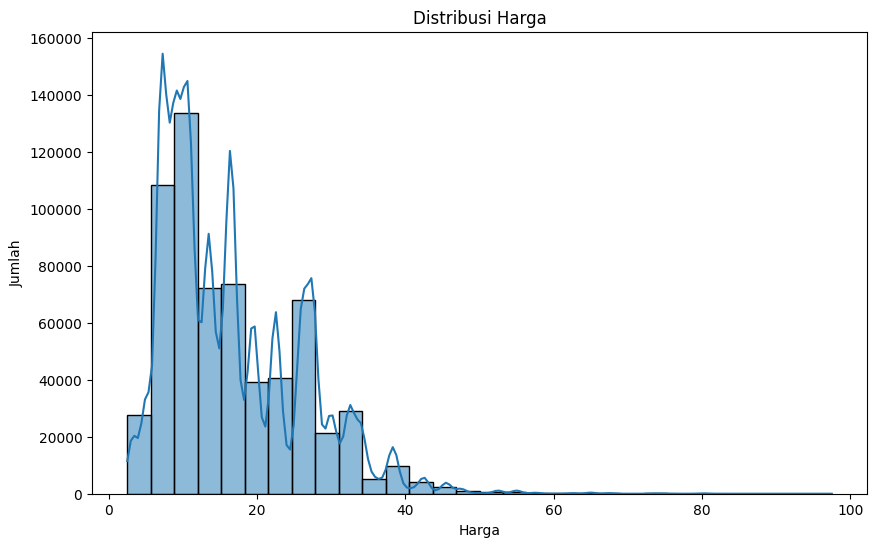

In [200]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga')
plt.ylabel('Jumlah')
plt.show()

## Hubungan Jarak dan Harga

C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


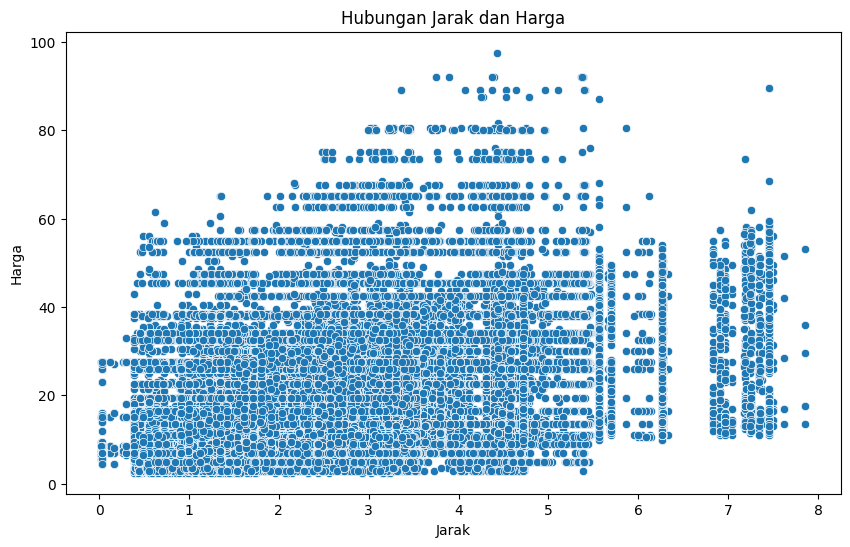

In [201]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance', y='price')
plt.title('Hubungan Jarak dan Harga')
plt.xlabel('Jarak')
plt.ylabel('Harga')
plt.show()

## Hubungan Jam dan Harga

C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

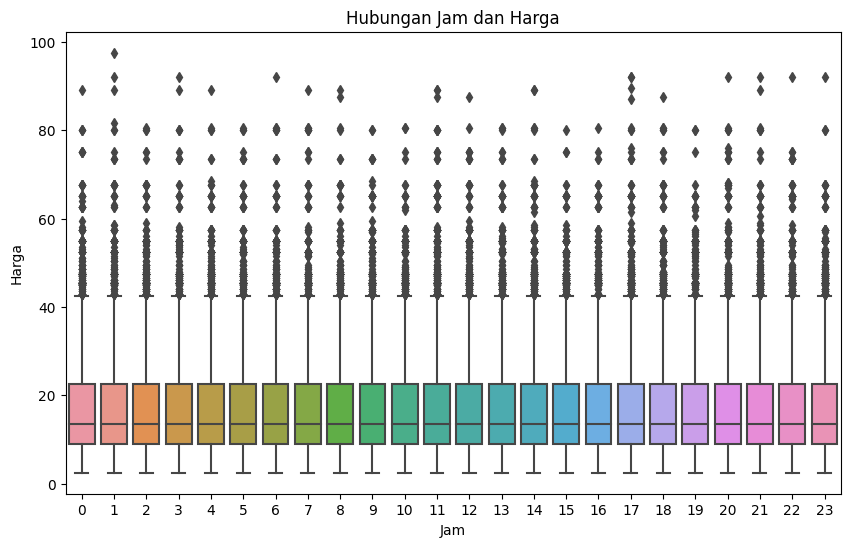

In [202]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hour', y='price')
plt.title('Hubungan Jam dan Harga')
plt.xlabel('Jam')
plt.ylabel('Harga')
plt.show()

## Hubungan Tipe Kendaraan dan Harga

C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

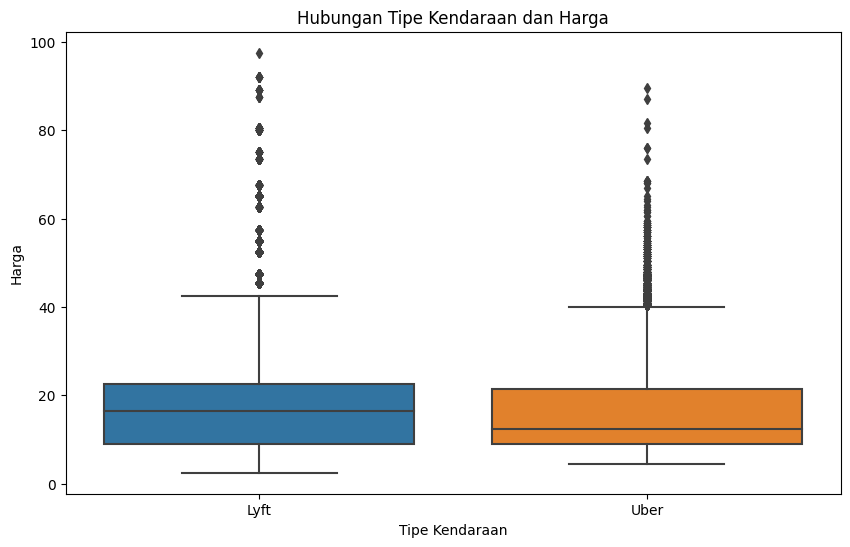

In [203]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cab_type', y='price')
plt.title('Hubungan Tipe Kendaraan dan Harga')
plt.xlabel('Tipe Kendaraan')
plt.ylabel('Harga')
plt.show()

## Jumlah Penggunaan Uber dan Lyft

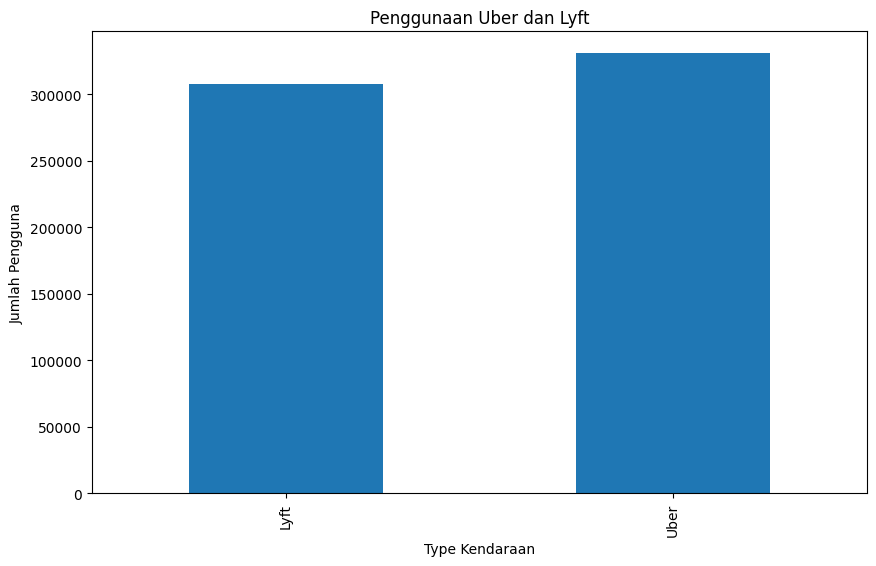

In [204]:
plt.figure(figsize=(10, 6))
df['cab_type'].value_counts().sort_index().plot(kind='bar')
plt.title('Penggunaan Uber dan Lyft')
plt.xlabel('Type Kendaraan')
plt.ylabel('Jumlah Pengguna')
plt.show()

## Pemesanan taxi Berdasarkan Cuaca

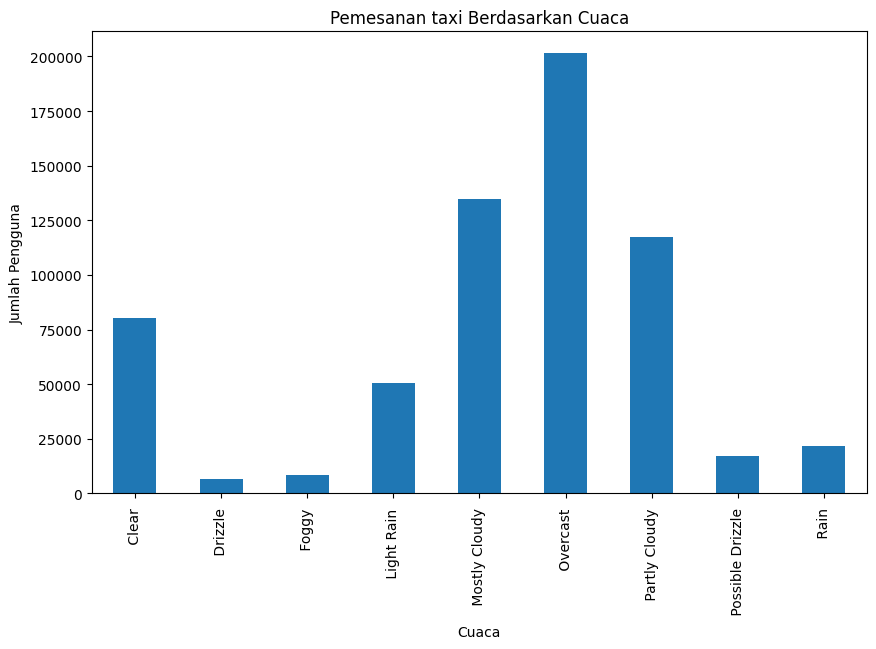

In [205]:
plt.figure(figsize=(10, 6))
df['short_summary'].value_counts().sort_index().plot(kind='bar')
plt.title('Pemesanan taxi Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.show()

## Jumlah data per Bulan

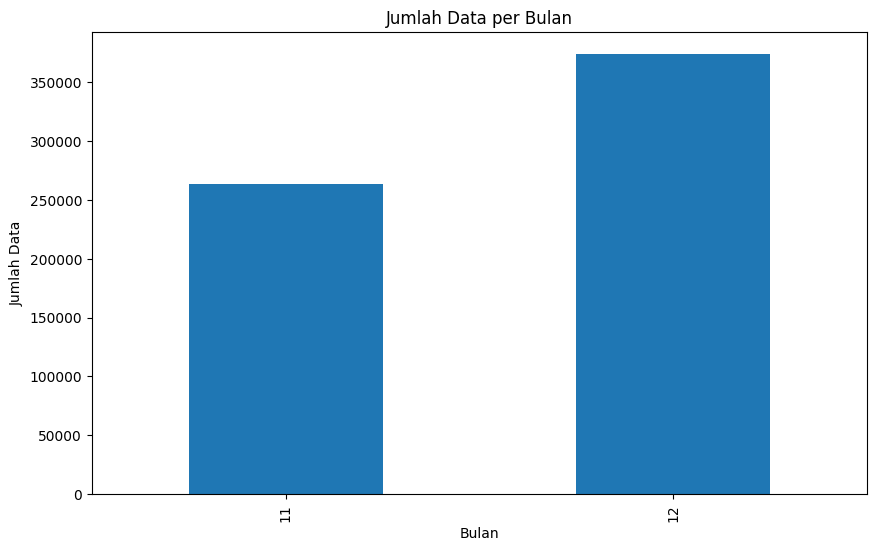

In [206]:
plt.figure(figsize=(10, 6))
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Jumlah Data per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Data')
plt.show()

# Data Preprocessing

## Outlier

Outlier merupakan nilai yang jauh berbeda dengan nilai yang lain pada dataset. Nilai ini dapat menjadi masalah dan memengaruhi hasil analisis, sehingga nilai outlier perlu dihapus

In [207]:
# Mendeteksi outlier dengan metode IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)  # kuartil pertama
Q3 = df['price'].quantile(0.75)  # kuartil ketiga
IQR = Q3 - Q1

lower_IQR = Q1 - 1.5 * IQR
upper_IQR = Q3 + 1.5 * IQR

outliers_upper = df['price'][(df['price'] > upper_IQR)]
outliers_lower = df['price'][(df['price'] < lower_IQR)]


In [208]:
# Menghapus data outlier
df = df.loc[df['price'] < upper_IQR]
df = df.loc[df['price'] > lower_IQR]

C:\Users\Abraham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


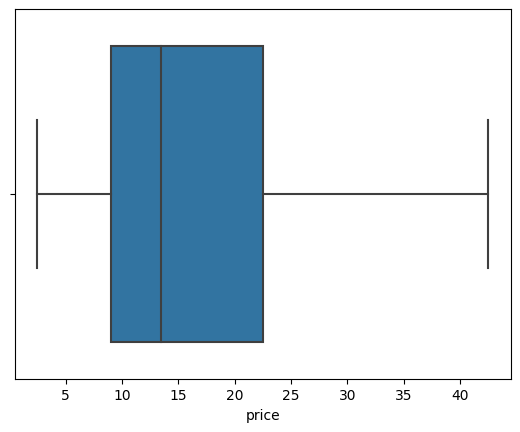

In [209]:
sns.boxplot(x=df['price'])
plt.show()

## Encoding

Pada Encoding, dataset tersebut diubah yang sebelumnya kategori/label menjadi numerik atau angka.

In [210]:
# Mengkategorikan data yang akan di Encoding
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
object_columns

['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary']

In [211]:
# Mengetahui jumlah nilai unik pada tiap kolom
df[object_columns].nunique()

source           12
destination      12
cab_type          2
product_id       12
name             12
short_summary     9
dtype: int64

In [212]:
encoded_df = df[object_columns]
not_encoded_df = df[numeric_columns]

In [213]:
# Menyimpan DataFrime ke dalam file pickle
df.to_pickle('df.pkl')

In [214]:
# Melakukan encoding
encoded_df = pd.get_dummies(encoded_df).astype('int')
df = pd.concat([not_encoded_df, encoded_df], axis = 1)
df.sample(3)

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
227534,19,13,12,4.50,0.54,1.00,32.85,0.00,0.00,0.56,2.65,3.83,9.96,18.66,1033.65,76,0.64,0,9.96,330.80,0.21,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
325085,2,2,12,9.00,2.46,1.00,36.50,0.00,0.00,0.82,1.92,2.38,9.69,31.68,1023.33,162,0.46,0,9.69,274.10,0.82,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
504718,13,13,12,30.00,2.46,1.50,22.18,0.00,0.00,0.64,3.32,3.54,9.43,11.78,1033.56,335,0.27,0,9.43,328.40,0.21,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Normalization

In [215]:
scaler = RobustScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [216]:
scaled_df.head()

,hour,day,month,price,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,-0.25,-0.07,0.00,-0.63,-1.04,0.00,0.26,0.00,0.00,-0.12,0.55,0.21,0.08,0.19,0.58,-1.12,-0.16,0.00,0.08,-0.09,-0.78,1.39,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,-0.83,0.67,-1.00,-0.19,-1.04,0.00,0.43,0.13,1.00,0.96,1.21,0.58,-3.26,1.05,-0.24,-0.94,0.29,0.00,-3.26,-0.40,-0.08,1.41,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,-0.92,0.73,-1.00,-0.48,-1.04,0.00,-0.30,0.00,0.00,0.17,0.28,-0.03,0.08,0.04,-0.77,-0.10,-1.25,0.00,0.08,0.20,0.00,1.16,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-0.67,0.87,-1.00,0.93,-1.04,0.00,-0.86,0.00,0.00,0.08,-0.13,-0.30,0.08,-0.38,0.20,0.29,-1.30,0.00,0.08,-0.40,0.14,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-0.75,0.80,-1.00,-0.33,-1.04,0.00,-0.43,0.00,0.00,-0.04,0.65,0.21,0.08,-0.20,-0.49,0.25,-0.60,0.00,0.08,0.99,0.08,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [217]:
X = scaled_df.drop(columns='price')
y = scaled_df['price']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Pendefinisian Model

Setelah dilakukan data cleaning dan data preprocessing, data tersebut kemudian akan digunakan untuk pelatihan model. Model yang akan dipakai pada project ini adalah linear regression. Linear Regression adalah algoritma yang menggunakan prinsip regresi yang paling sederhana dan banyak digunakan serta kemudahan dalam interpretasi hasil.

In [219]:
# Membuat model Linear Regression
lr = LinearRegression()

# Pelatihan Model

Pelatihan model merupakan proses untuk menjalankan algoritma yang didalamnya sudah terbagi menjadi data training untuk mendapatkan output tertentu

In [220]:
import joblib
# Melakukan pelatihan model
lr.fit(X_train, y_train)

# Simpan model ke dalam file 'model.pkl'
joblib.dump(lr, 'model.pkl')

['model.pkl']

# Evaluasi Model

Evaluasi model merupakan menguji akurasi dari data testing. Evaluasi dilakukan dengan menggunakan MSE (Mean Squared Eror), semakin rendah nilai MSE semakin baik model.

In [221]:
y_pred = lr.predict(X_test)

In [222]:
mse = mean_squared_error(y_test, y_pred)
print('MSE Linear Regression:', mse)

MSE Linear Regression: 0.02762069635843426


# Model Inference

Model Inference merupakan pelatihan model yang kita buat dengan data selain data yang sudah tersedia. Model tersebut kita latih dengan data yang telah dibuat seperti dibawah ini.

In [223]:
X_train.sample(3)

,hour,day,month,distance,surge_multiplier,temperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,product_id_55c66225-fbe7-4fd5-9072-eab1ece5e23e,product_id_6c84fd89-3f11-4782-9b50-97c468b19529,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
534884,-0.42,0.87,-1.00,-0.44,0.00,-1.41,0.00,0.00,0.58,-0.74,-0.61,0.04,-0.40,0.25,0.34,-1.30,0.00,0.04,-0.50,0.22,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
610821,0.75,0.60,-1.00,0.53,0.00,0.68,0.00,0.00,0.54,0.19,-0.09,0.08,0.94,0.06,-0.80,0.29,0.00,0.08,-0.30,-0.08,1.34,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
466058,0.92,-0.07,0.00,1.49,0.00,0.11,0.06,0.94,0.63,0.48,0.10,-3.73,0.65,0.16,-1.12,0.29,0.00,-3.73,0.44,-0.78,1.36,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [224]:
# Membuat dataframe baru yang berisi 3 sample acak
data_inference = X_train.sample(3)

In [225]:
# Meload model dari file 'model.pkl'
model = joblib.load('model.pkl')

# Lakukan prediksi
y_pred_inference = model.predict(data_inference)

In [226]:
# Menampilkan hasil prediksi
print("Hasil Prediksi data baru:")
print(y_pred_inference)

Hasil Prediksi data baru:
[ 0.98631525 -0.70028067  0.18149042]


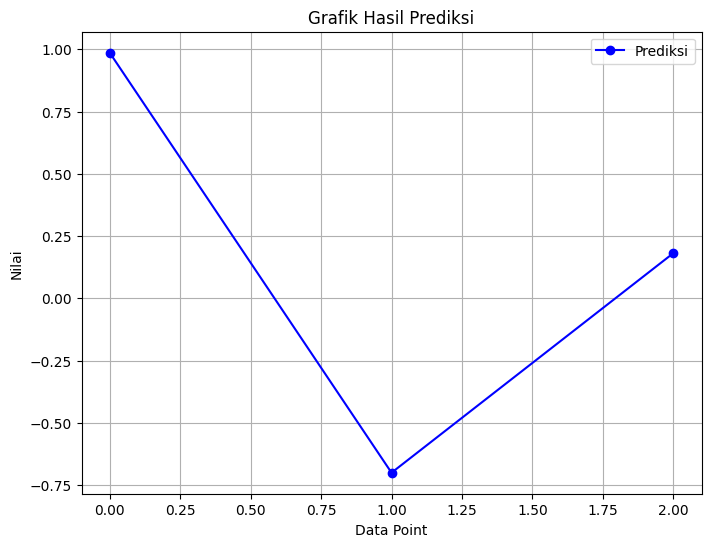

In [227]:
# Visualisasi prediksi
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_pred_inference)), y_pred_inference, label='Prediksi', marker='o', linestyle='-', color='b')
plt.xlabel('Data Point')
plt.ylabel('Nilai')
plt.title('Grafik Hasil Prediksi')
plt.legend()
plt.grid(True)
plt.show()

In [228]:
# Deskripsi statistik
mean_pred = np.mean(y_pred_inference)
median_pred = np.median(y_pred_inference)
std_dev_pred = np.std(y_pred_inference)

print(f"Rata-rata Prediksi: {mean_pred}")
print(f"Median Prediksi: {median_pred}")
print(f"Deviasi Standar Prediksi: {std_dev_pred}")

Rata-rata Prediksi: 0.15584166844685873
Median Prediksi: 0.18149042129516602
Deviasi Standar Prediksi: 0.688788714817445


# Kesimpulan

Berdasarkan analisis yang telah dilakukan dapat disimpulkan :

 - Tipe kendaraan Lyft relatif lebih mahal dibandingkan dengan tipe kendaraan Uber sehingga Uber lebih banyak pengguna dibandingkan Lyft.
 - Cuaca memengaruhi tingkat pemesanan taxi dan rata-rata orang memesan pada saat Overcast
 - Berdasarkan evaluasi, model dengan Linear Regression memiliki nilai MSE yang kecil yaitu sebesar 0.027488 yang menunjukkan bahwa model tersebut cukup baik dalam memprediksi harga. Semakin kecil nilai MSE maka semakin akurat juga model dalam memprediksi.
 - Beberapa faktor yang berpengaruh signifikan terhadap harga taksi, seperti jarak tempuh, cuaca, dan tipe kendaraan.